In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("gold_monthly_csv.csv")
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [3]:
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [4]:
df.shape

(847, 2)

In [5]:
print(f"Date range of gold prices available from : {df.loc[:, 'Date'] [0]} to {df.loc[:,'Date'] [len(df)-1]}")

Date range of gold prices available from : 1950-01 to 2020-07


In [6]:
date = pd.date_range (start = '1/1/1950', end = '8/1/2020', freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='ME')

***Set index as a Months and drop Date axis 1***

In [7]:
df['month'] = date
df.drop('Date', axis=1, inplace= True)
df=df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


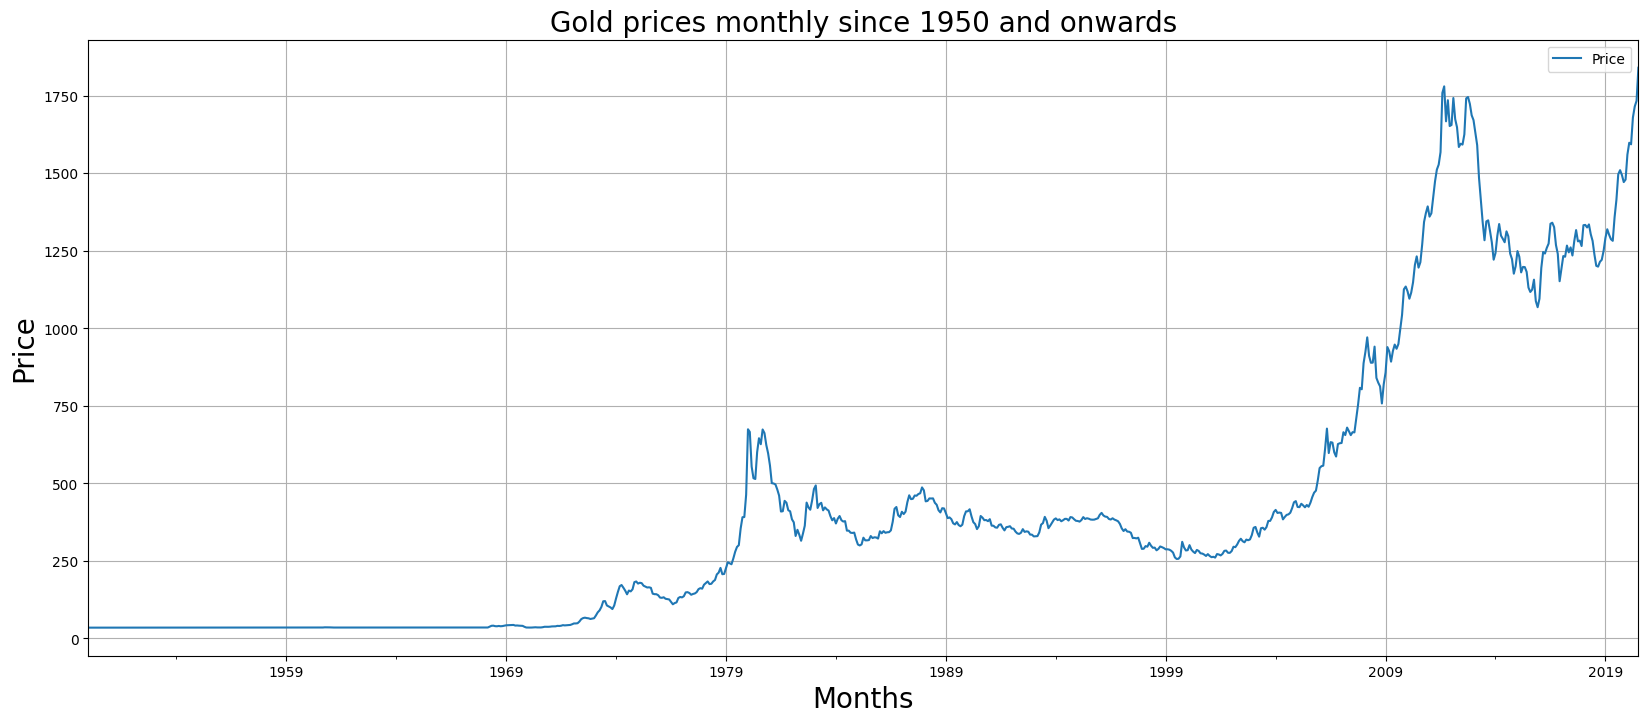

In [8]:
df.plot(figsize=(20,8))
plt.title("Gold prices monthly since 1950 and onwards",fontsize = 20)
plt.xlabel("Months",fontsize = 20)
plt.ylabel("Price",fontsize = 20)
plt.grid();

In [9]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


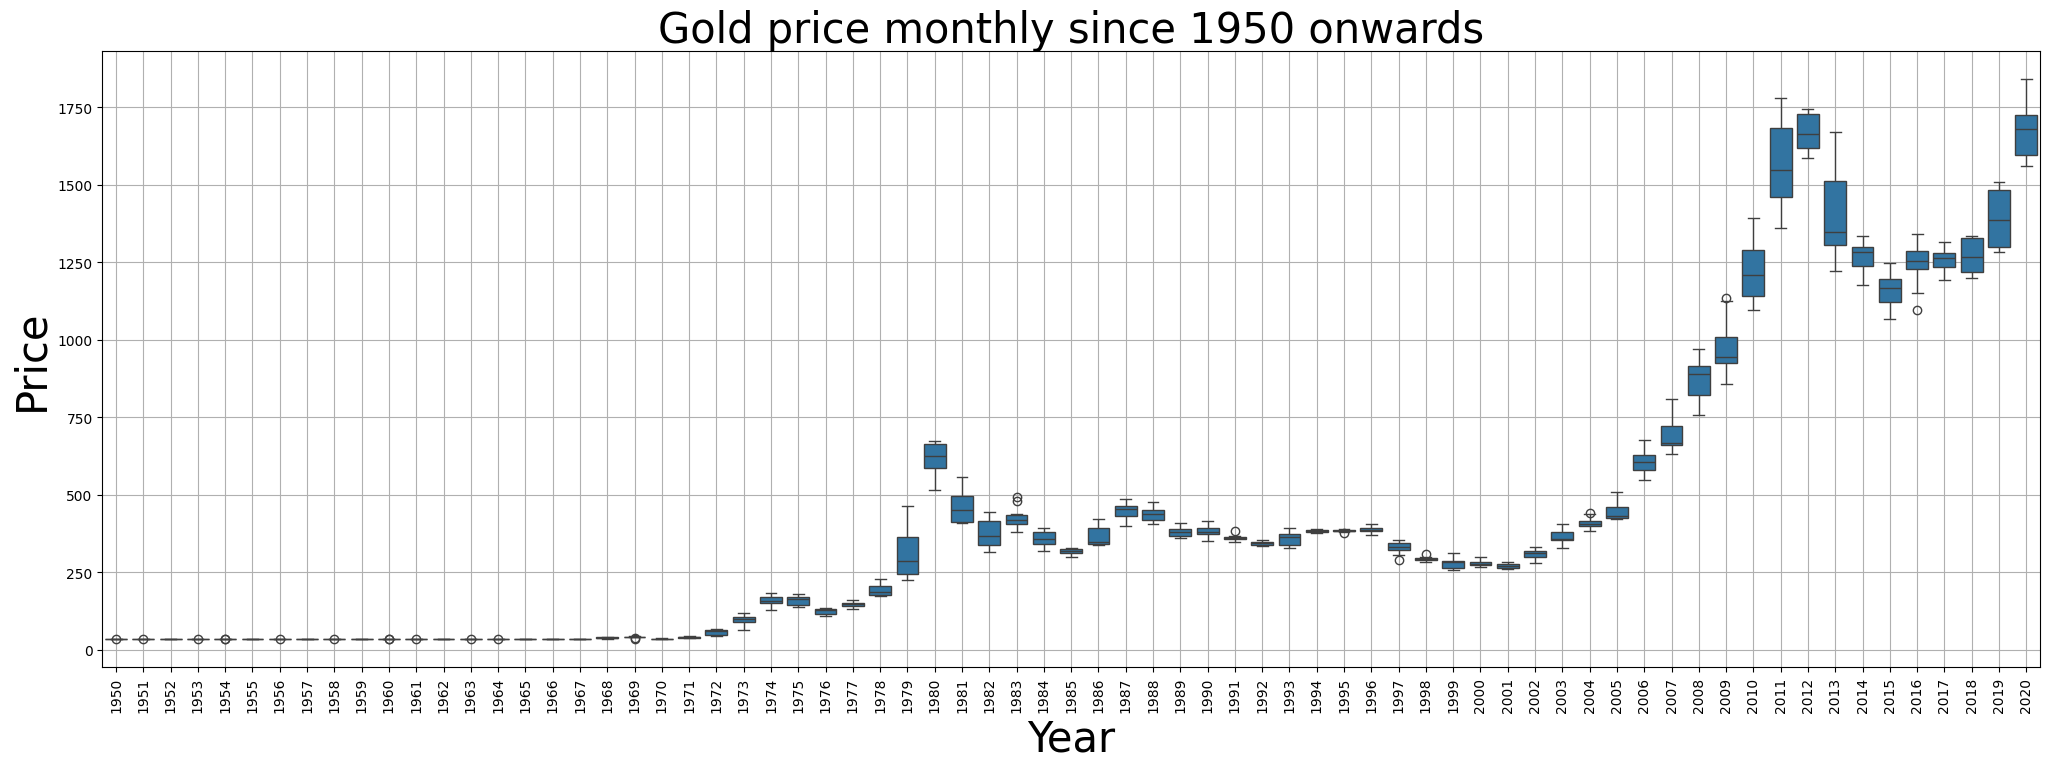

In [10]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.year, y = df.values[:,0], ax=ax)
plt.title('Gold price monthly since 1950 onwards',fontsize = 30)
plt.xlabel('Year', fontsize = 30)
plt.ylabel('Price', fontsize = 30)
plt.xticks(rotation = 90)
plt.grid();

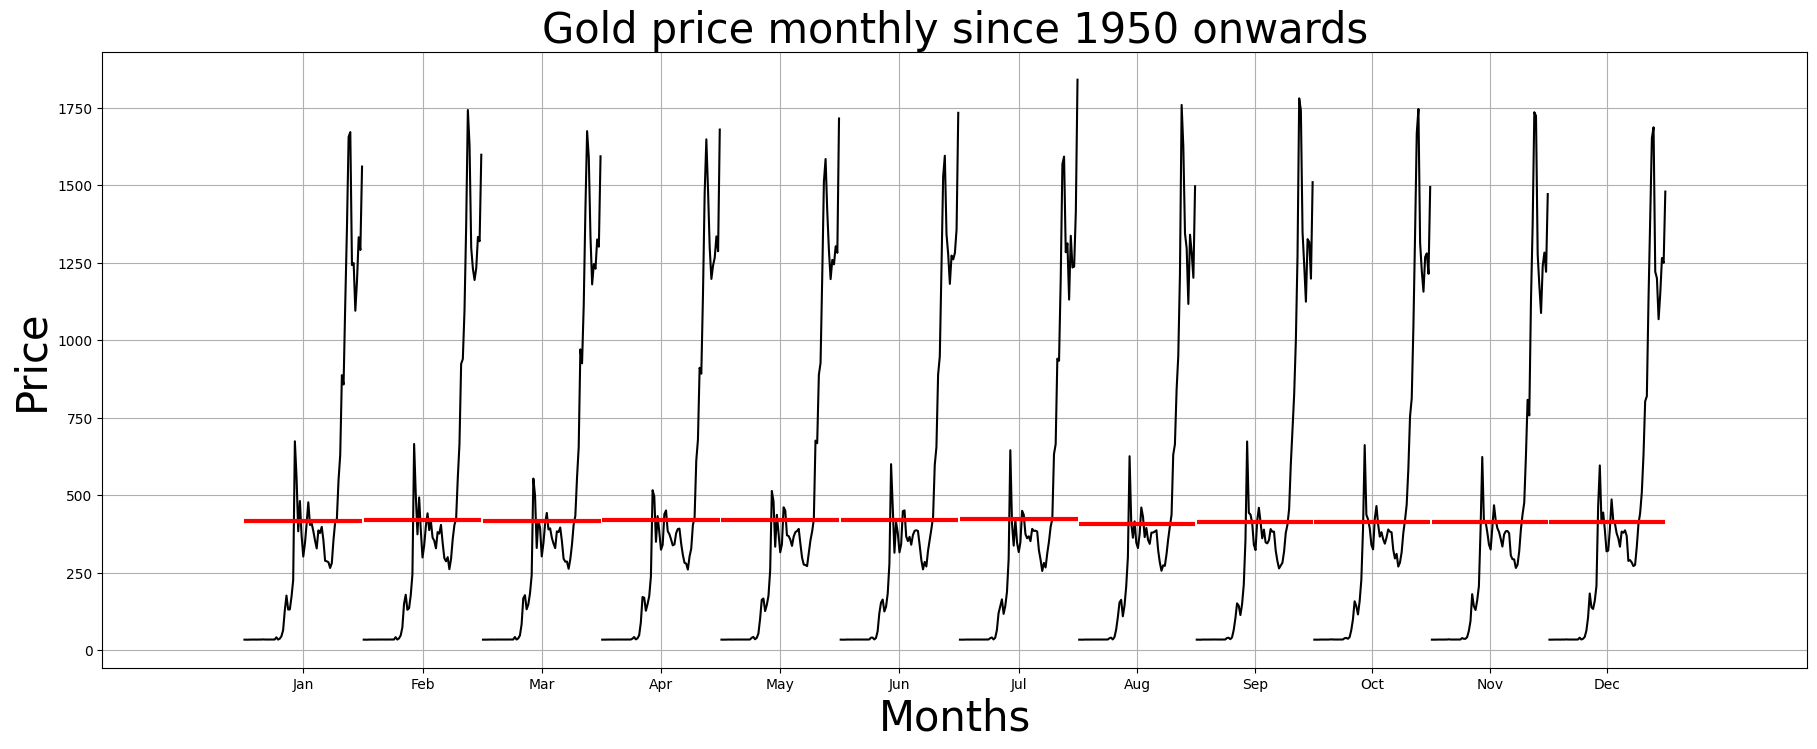

In [11]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))
month_plot(df, ylabel = ' Gold Price' , ax=ax)
plt.title('Gold price monthly since 1950 onwards',fontsize = 30)
plt.xlabel('Months', fontsize = 30)
plt.ylabel('Price', fontsize = 30)
plt.grid();

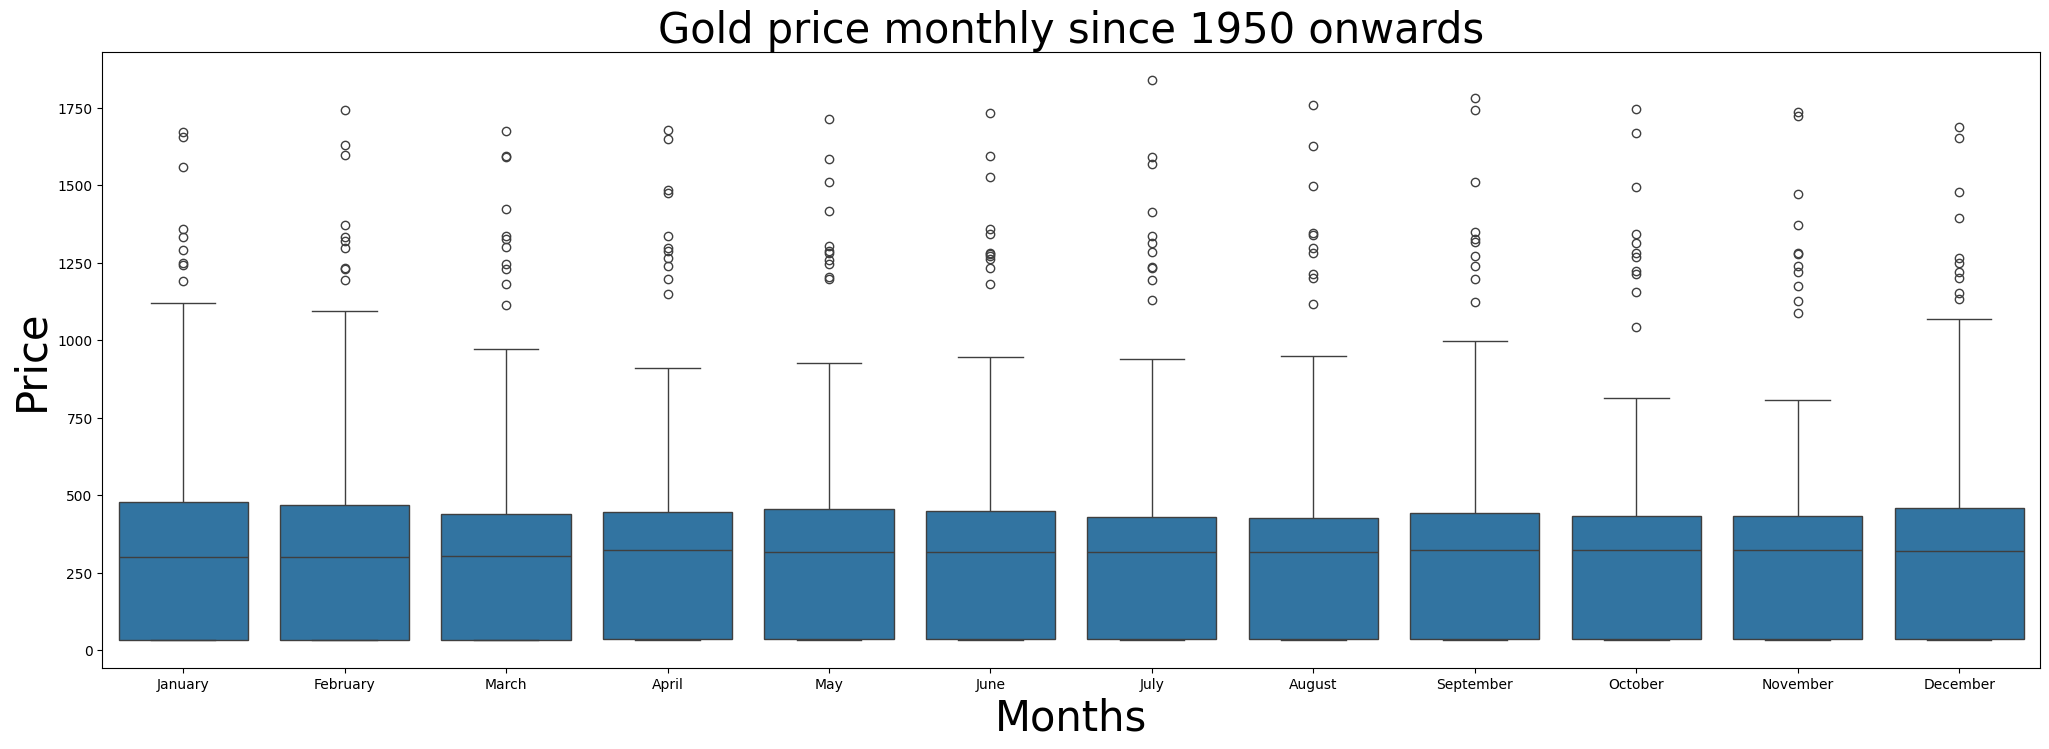

In [12]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.month_name(), y = df.values[:,0], ax=ax)
plt.title('Gold price monthly since 1950 onwards',fontsize = 30)
plt.xlabel('Months', fontsize = 30)
plt.ylabel('Price', fontsize = 30)
plt.show();

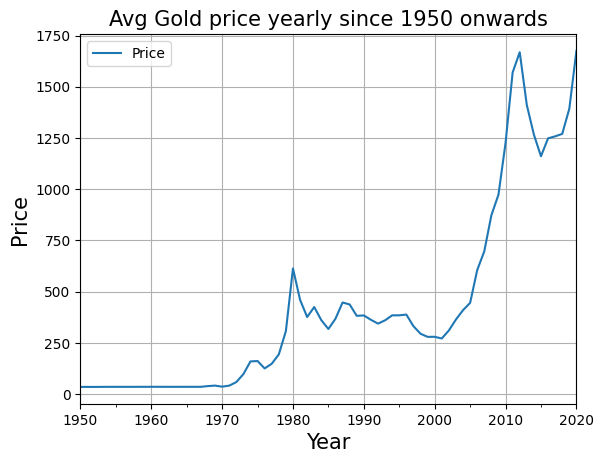

In [13]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot();
plt.title('Avg Gold price yearly since 1950 onwards',fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.grid();

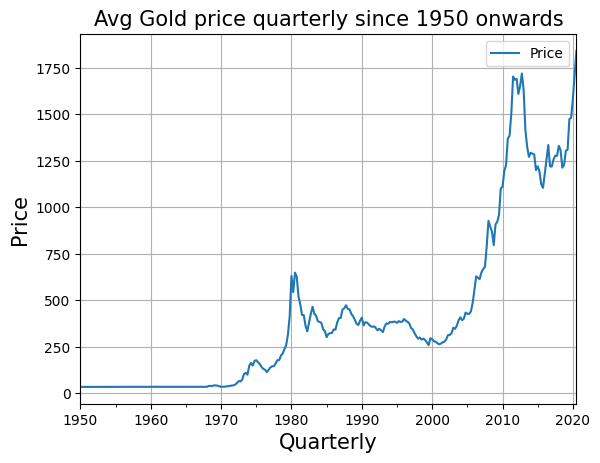

In [14]:
df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot();
plt.title('Avg Gold price quarterly since 1950 onwards',fontsize = 15)
plt.xlabel('Quarterly', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.grid();

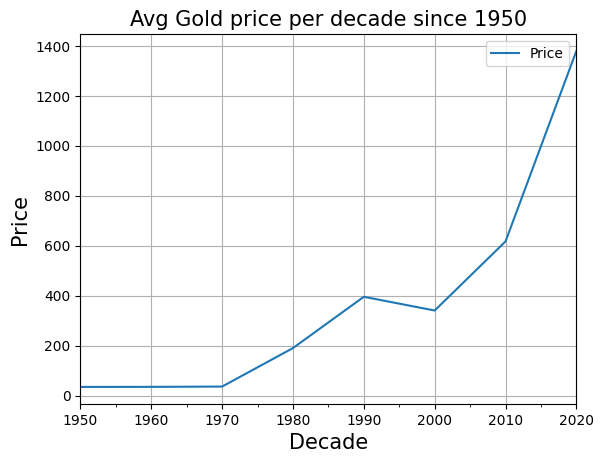

In [15]:
df_decate_sum = df.resample('10Y').mean()
df_decate_sum.plot();
plt.title('Avg Gold price per decade since 1950',fontsize = 15)
plt.xlabel('Decade', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.grid();

In [16]:
df_1 = df.groupby(df.index.year).mean().rename(columns= { 'Price' : 'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price' : 'Std'}), left_index= True, right_index= True)
df_1['Cov_pct']= ((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


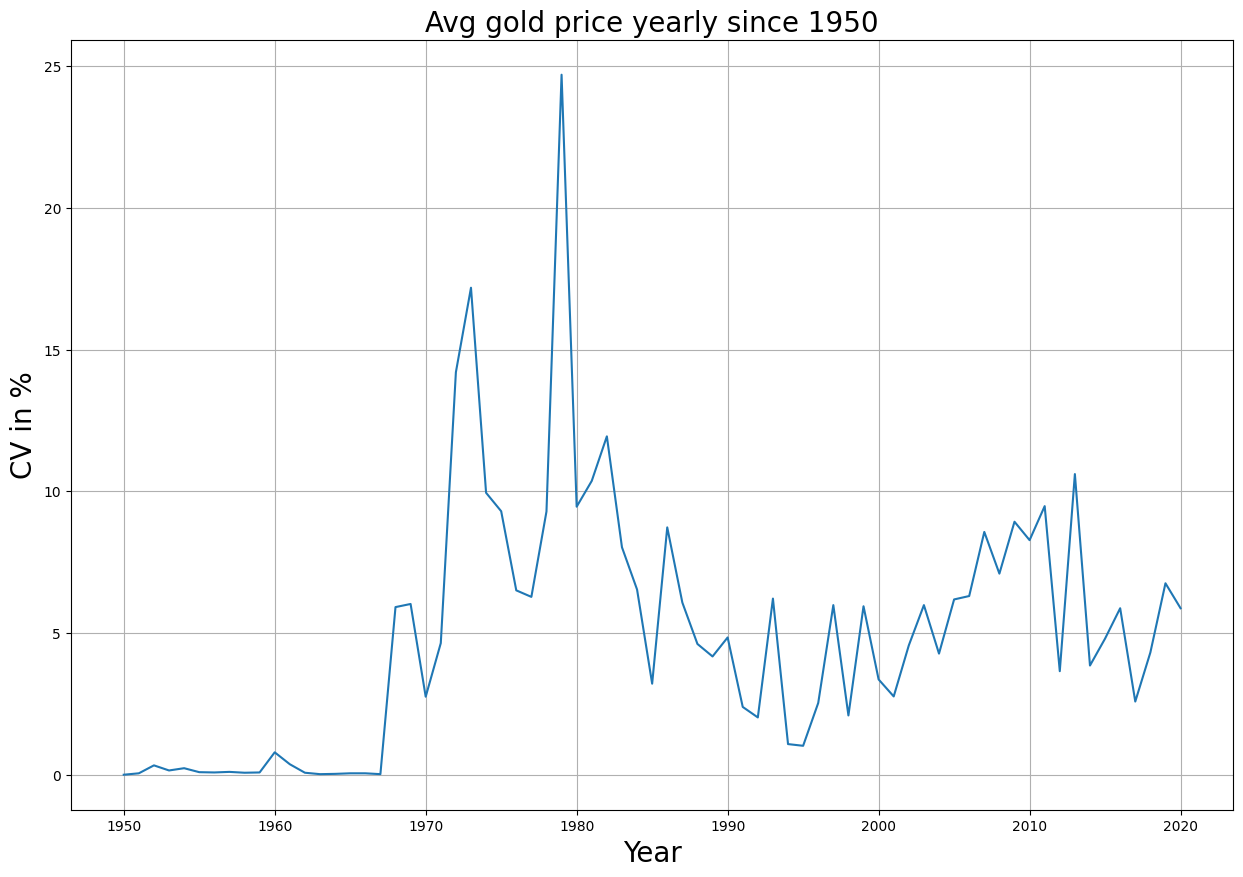

In [17]:
fig, ax= plt.subplots(figsize= (15,10))
df_1['Cov_pct'].plot();
plt.title("Avg gold price yearly since 1950",fontsize = 20)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('CV in %',fontsize = 20)
plt.grid();

In [18]:
train = df[df.index.year <= 2015]
test =  df[df.index.year > 2015]

In [19]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


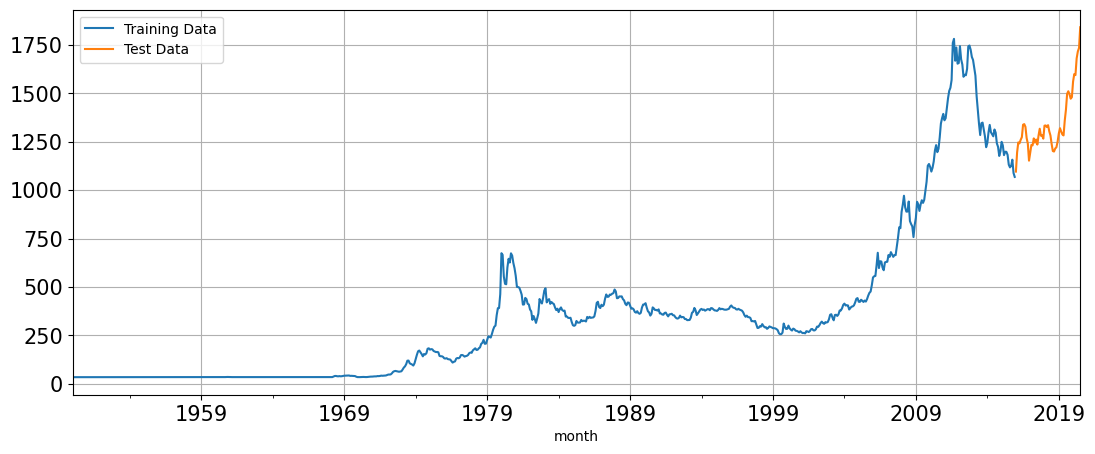

In [20]:
train["Price"].plot(figsize=(13,5), fontsize=15)
test["Price"].plot(figsize=(13,5), fontsize =15)
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show()

In [21]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

In [22]:
LR_train = train.copy()
LR_test =test.copy()

In [23]:
LR_train['time']=train_time
LR_test['time']=test_time

In [24]:
lr =LinearRegression()
lr.fit(LR_train[['time']],LR_train["Price"].values)

LinearRegression()

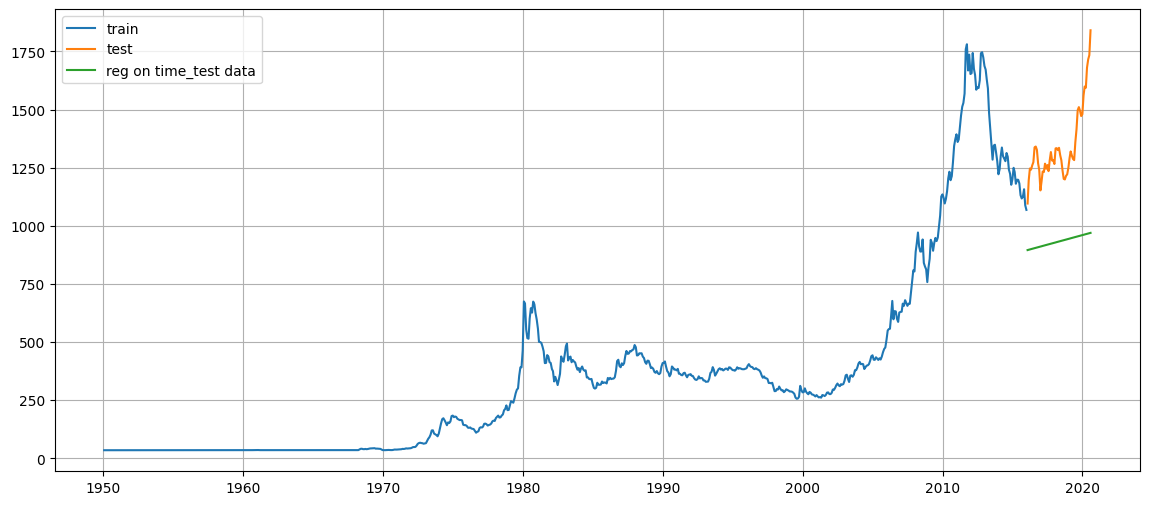

In [25]:
test_prediction_model1 = lr.predict(LR_test[["time"]])
LR_test['forecast'] = test_prediction_model1

plt.figure(figsize =(14,6))
plt.plot(train['Price'], label ='train')
plt.plot(test["Price"],label = 'test')
plt.plot(LR_test['forecast'], label = 'reg on time_test data')
plt.legend(loc = 'best')
plt.grid();

In [26]:
def mape(actual, pred):
    return round((np.mean(abs(actual - pred)/ actual))*100, 2)

In [27]:
mape_model1_test = mape(test['Price'].values,test_prediction_model1)
print("MAPE is %3.3f"%(mape_model1_test),"%")

MAPE is 29.760 %


In [28]:
results = pd.DataFrame({'Test Mape (%)': [mape_model1_test]}, index=["RegressionOnTime"])
results

,Test Mape (%)
RegressionOnTime,29.76


In [29]:
Naive_train = train.copy()
Naive_test = test.copy()

In [30]:
Naive_test['naive'] = np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

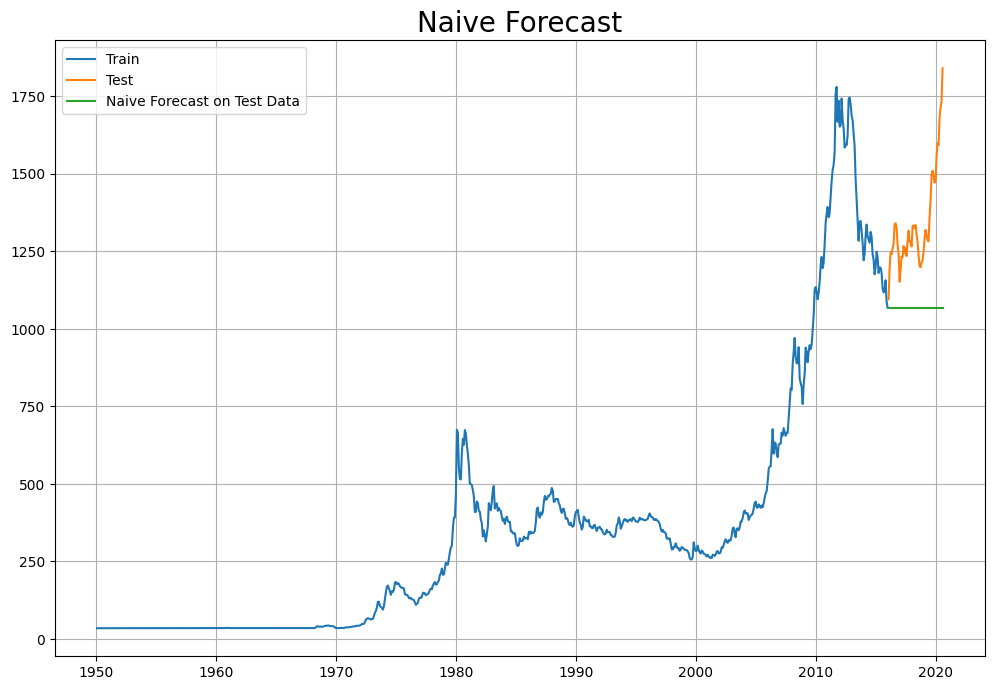

In [31]:
plt.figure(figsize =(12,8))
plt.plot(Naive_train['Price'], label ='Train')
plt.plot(test["Price"],label = 'Test')
plt.plot(Naive_test['naive'], label = 'Naive Forecast on Test Data')
plt.legend(loc = 'best')
plt.title("Naive Forecast",fontsize = 20)
plt.grid();

In [32]:
mape_model2_test = mape(test['Price'].values,Naive_test['naive'].values)
print("For Naive Forecast on the Test Data, MAPE is %3.3f"%(mape_model2_test),"%")

For Naive Forecast on the Test Data, MAPE is 19.380 %


In [33]:
resultsDf_2 = pd.DataFrame({'Test MAPE (%)': [mape_model2_test]}, index=["NaiveModel"])
results = pd.concat([results, resultsDf_2])
results

,Test Mape (%),Test MAPE (%)
RegressionOnTime,29.76,NaN
NaiveModel,NaN,19.38


In [34]:
final_model = ExponentialSmoothing(df,
                                  trend = 'additive',
                                  seasonal = 'additive').fit(smoothing_level = 0.4,
                                                            smoothing_trend = 0.3,
                                                            smoothing_seasonal = 0.6)

In [35]:
Mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print("MAPE:", Mape_final_model)

MAPE: 17.24


In [36]:
predictions = final_model.forecast(steps=len(test))

In [37]:
pred_df = pd.DataFrame({'lower_CI': predictions - 1.96*np.std(final_model.resid,ddof=1),
                        'prediction':predictions,
                        'upper_CI': predictions+ 1.96*np.std(final_model.resid,ddof =1)})
pred_df

,lower_CI,prediction,upper_CI
2020-08-31,1684.718982,1792.869955,1901.020927
2020-09-30,1615.303307,1723.454279,1831.605251
2020-10-31,1538.563216,1646.714189,1754.865161
2020-11-30,1476.751963,1584.902935,1693.053908
2020-12-31,1459.318980,1567.469952,1675.620924
2021-01-31,1514.408075,1622.559048,1730.710020
2021-02-28,1545.342214,1653.493186,1761.644158
2021-03-31,1556.754081,1664.905054,1773.056026
2021-04-30,1648.299827,1756.450799,1864.601771
2021-05-31,1694.216393,1802.367365,1910.518337


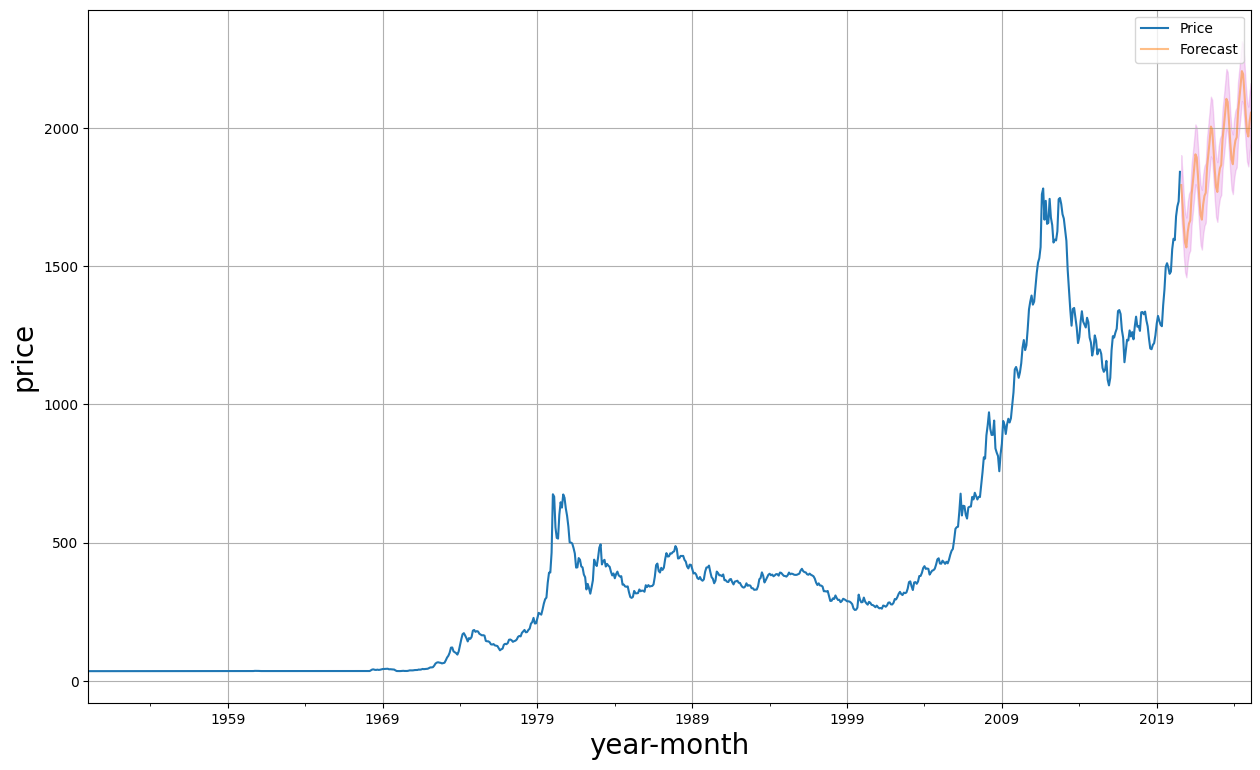

In [38]:
axis = df.plot(label= 'Actual', figsize=(15,9))
pred_df['prediction'].plot(ax= axis, label = 'Forecast', alpha =0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color = 'm', alpha = .15)
axis.set_xlabel('year-month',fontsize = 20)
axis.set_ylabel('price',fontsize = 20)
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [ ]:
import tkinter as tk
from tkinter import ttk, filedialog, messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pandas as pd
import matplotlib.pyplot as plt

class GoldPriceApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Gold Price Forecasting")
        self.root.geometry("1200x800")
        self.root.configure(bg='#1f1f1f')  # Dark background

        self.df = None
        self.pred_df = None

        # Adding a style
        style = ttk.Style()
        style.theme_use('clam')
        style.configure("TButton", font=("Helvetica", 12, "bold"), background="#00bfae", foreground="white", padding=10)
        style.map("TButton", background=[("active", "#008f7a")], foreground=[("active", "white")])
        style.configure("TLabel", font=("Helvetica", 12, "bold"), background="#1f1f1f", foreground="white")
        style.configure("TFrame", background="#1f1f1f")
        style.configure("Treeview", font=("Helvetica", 10), rowheight=25, background="#2f2f2f", foreground="white", fieldbackground="#2f2f2f")
        style.configure("Treeview.Heading", font=("Helvetica", 12, "bold"), background="#00bfae", foreground="white")

        # Main title
        title_label = ttk.Label(root, text="Predictions of The Gold Price Between Aug 2020 to Feb 2025",
                                font=("Helvetica", 16, "bold"), background="#1f1f1f", foreground="#ffffff")
        title_label.pack(pady=10)

        # Frame for input and buttons
        input_frame = ttk.Frame(root, style="TFrame")
        input_frame.pack(pady=20)

        # Load data button
        self.load_button = ttk.Button(input_frame, text="Load Data", command=self.load_data, style='TButton')
        self.load_button.grid(row=0, column=0, padx=10)

        # Date entry
        self.date_label = ttk.Label(input_frame, text="Enter Date (YYYY-MM-DD):", style="TLabel")
        self.date_label.grid(row=0, column=1, padx=10)
        self.date_entry = ttk.Entry(input_frame, font=("Helvetica", 12))
        self.date_entry.grid(row=0, column=2, padx=10)

        # Search button
        self.search_button = ttk.Button(input_frame, text="Search Price", command=self.search_price, state=tk.DISABLED, style='TButton')
        self.search_button.grid(row=0, column=3, padx=10)

        # Plot data button
        self.plot_button = ttk.Button(input_frame, text="Plot Data", command=self.plot_data, state=tk.DISABLED, style='TButton')
        self.plot_button.grid(row=0, column=4, padx=10)

        # Treeview for displaying forecast values
        self.tree = None
        self.canvas = None

    def load_data(self):
        file_path = filedialog.askopenfilename(filetypes=[("Excel files", "*.xlsx")])
        if file_path:
            try:
                self.df = pd.read_excel(file_path, sheet_name='HistoricalData')
                self.pred_df = pd.read_excel(file_path, sheet_name='ForecastedData')
            except Exception as e:
                messagebox.showerror("Error", f"Error loading data: {e}")
                return

            print("Historical Data Loaded:")
            print(self.df.head())

            print("Forecasted Data Loaded:")
            print(self.pred_df.head())

            self.df.set_index(pd.to_datetime(self.df['Date']), inplace=True)
            self.pred_df.set_index(pd.to_datetime(self.pred_df['Date']), inplace=True)
            self.plot_button.config(state=tk.NORMAL)
            self.search_button.config(state=tk.NORMAL)
            messagebox.showinfo("Data Load", "Data loaded successfully!")

    def plot_data(self):
        if self.df is not None and self.pred_df is not None:
            fig, ax = plt.subplots(figsize=(10, 5))
            self.df['Price'].plot(ax=ax, label='Actual')
            self.pred_df['prediction'].plot(ax=ax, label='Forecast', alpha=0.7)
            ax.fill_between(self.pred_df.index, self.pred_df['lower_CI'], self.pred_df['upper_CI'], color='orange', alpha=0.2)
            ax.set_title("Gold Price Forecast")
            ax.set_xlabel("Months")
            ax.set_ylabel("Price")
            ax.legend()

            if self.canvas:
                self.canvas.get_tk_widget().pack_forget()

            self.canvas = FigureCanvasTkAgg(fig, master=self.root)
            self.canvas.draw()
            self.canvas.get_tk_widget().pack()

    def search_price(self):
        date_str = self.date_entry.get()
        try:
            date = pd.to_datetime(date_str)
            # Find the last day of the month for the input date
            last_day_of_month = date + pd.offsets.MonthEnd(0)
            print(f"Searching for date: {last_day_of_month}")
            if last_day_of_month in self.pred_df.index:
                row = self.pred_df.loc[last_day_of_month]
                result = f"Date: {date_str}\nPrediction: {row['prediction']}\nLower CI: {row['lower_CI']}\nUpper CI: {row['upper_CI']}"
            else:
                result = "Forecast not available for this date."
        except Exception as e:
            result = f"Invalid date format or error: {e}"

        messagebox.showinfo("Gold Price Prediction", result)

if __name__ == "__main__":
    root = tk.Tk()
    app = GoldPriceApp(root)
    root.mainloop()


In [ ]:
import tkinter as tk
from tkinter import ttk, filedialog, messagebox
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Admin Login Class
class AdminLogin:
    def __init__(self, root):
        self.root = root
        self.root.title("Admin Login")
        self.root.geometry("400x250")
        self.root.configure(bg='#1f1f1f')

        self.create_widgets()

    def create_widgets(self):
        style = ttk.Style()
        style.theme_use('clam')
        style.configure("TButton", font=("Helvetica", 12, "bold"), background="#00bfae", foreground="white", padding=10)
        style.map("TButton", background=[("active", "#008f7a")], foreground=[("active", "white")])
        style.configure("TLabel", font=("Helvetica", 12, "bold"), background="#1f1f1f", foreground="white")
        style.configure("TFrame", background="#1f1f1f")
        style.configure("TEntry", font=("Helvetica", 12))

        # Login frame
        login_frame = ttk.Frame(self.root, style="TFrame")
        login_frame.pack(pady=50)

        # Username
        username_label = ttk.Label(login_frame, text="Username:", style="TLabel")
        username_label.grid(row=0, column=0, padx=10, pady=10)
        self.username_entry = ttk.Entry(login_frame, style="TEntry")
        self.username_entry.grid(row=0, column=1, padx=10, pady=10)

        # Password
        password_label = ttk.Label(login_frame, text="Password:", style="TLabel")
        password_label.grid(row=1, column=0, padx=10, pady=10)
        self.password_entry = ttk.Entry(login_frame, show="*", style="TEntry")
        self.password_entry.grid(row=1, column=1, padx=10, pady=10)

        # Login button
        login_button = ttk.Button(login_frame, text="Login", command=self.check_login, style="TButton")
        login_button.grid(row=2, column=0, columnspan=2, pady=20)

    def check_login(self):
        username = self.username_entry.get()
        password = self.password_entry.get()

        # Simple hardcoded credentials check for demonstration purposes
        if username == "admin" and password == "password":
            self.root.destroy()  # Close login window
            self.open_main_app()  # Open main application
        else:
            messagebox.showerror("Error", "Invalid Username or Password")

    def open_main_app(self):
        root = tk.Tk()
        app = GoldPriceApp(root)
        root.mainloop()

# Main Application Class
class GoldPriceApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Gold Price Forecasting")
        self.root.geometry("1200x800")
        self.root.configure(bg='#1f1f1f')  # Dark background

        self.df = None
        self.pred_df = None

        # Adding a style
        style = ttk.Style()
        style.theme_use('clam')
        style.configure("TButton", font=("Helvetica", 12, "bold"), background="#00bfae", foreground="white", padding=10)
        style.map("TButton", background=[("active", "#008f7a")], foreground=[("active", "white")])
        style.configure("TLabel", font=("Helvetica", 12, "bold"), background="#1f1f1f", foreground="white")
        style.configure("TFrame", background="#1f1f1f")
        style.configure("Treeview", font=("Helvetica", 10), rowheight=25, background="#2f2f2f", foreground="white", fieldbackground="#2f2f2f")
        style.configure("Treeview.Heading", font=("Helvetica", 12, "bold"), background="#00bfae", foreground="white")

        # Main title
        title_label = ttk.Label(root, text="Predictions of The Gold Price Between Aug 2020 to Feb 2025",
                                font=("Helvetica", 16, "bold"), background="#1f1f1f", foreground="#ffffff")
        title_label.pack(pady=10)

        # Frame for input and buttons
        input_frame = ttk.Frame(root, style="TFrame")
        input_frame.pack(pady=20)

        # Load data button
        self.load_button = ttk.Button(input_frame, text="Load Data", command=self.load_data, style='TButton')
        self.load_button.grid(row=0, column=0, padx=10)

        # Date entry
        self.date_label = ttk.Label(input_frame, text="Enter Date (YYYY-MM-DD):", style="TLabel")
        self.date_label.grid(row=0, column=1, padx=10)
        self.date_entry = ttk.Entry(input_frame, font=("Helvetica", 12))
        self.date_entry.grid(row=0, column=2, padx=10)

        # Search button
        self.search_button = ttk.Button(input_frame, text="Search Price", command=self.search_price, state=tk.DISABLED, style='TButton')
        self.search_button.grid(row=0, column=3, padx=10)

        # Plot data button
        self.plot_button = ttk.Button(input_frame, text="Plot Data", command=self.plot_data, state=tk.DISABLED, style='TButton')
        self.plot_button.grid(row=0, column=4, padx=10)

        # Treeview for displaying forecast values
        self.tree = None
        self.canvas = None

    def load_data(self):
        file_path = filedialog.askopenfilename(filetypes=[("Excel files", "*.xlsx")])
        if file_path:
            try:
                self.df = pd.read_excel(file_path, sheet_name='HistoricalData')
                self.pred_df = pd.read_excel(file_path, sheet_name='ForecastedData')
            except Exception as e:
                messagebox.showerror("Error", f"Error loading data: {e}")
                return

            print("Historical Data Loaded:")
            print(self.df.head())

            print("Forecasted Data Loaded:")
            print(self.pred_df.head())

            self.df.set_index(pd.to_datetime(self.df['Date']), inplace=True)
            self.pred_df.set_index(pd.to_datetime(self.pred_df['Date']), inplace=True)
            self.plot_button.config(state=tk.NORMAL)
            self.search_button.config(state=tk.NORMAL)
            messagebox.showinfo("Data Load", "Data loaded successfully!")

    def plot_data(self):
        if self.df is not None and self.pred_df is not None:
            fig, ax = plt.subplots(figsize=(10, 5))
            self.df['Price'].plot(ax=ax, label='Actual')
            self.pred_df['prediction'].plot(ax=ax, label='Forecast', alpha=0.7)
            ax.fill_between(self.pred_df.index, self.pred_df['lower_CI'], self.pred_df['upper_CI'], color='orange', alpha=0.2)
            ax.set_title("Gold Price Forecast")
            ax.set_xlabel("Months")
            ax.set_ylabel("Price")
            ax.legend()

            if self.canvas:
                self.canvas.get_tk_widget().pack_forget()

            self.canvas = FigureCanvasTkAgg(fig, master=self.root)
            self.canvas.draw()
            self.canvas.get_tk_widget().pack()

    def search_price(self):
        date_str = self.date_entry.get()
        try:
            date = pd.to_datetime(date_str)
            # Find the last day of the month for the input date
            last_day_of_month = date + pd.offsets.MonthEnd(0)
            print(f"Searching for date: {last_day_of_month}")
            if last_day_of_month in self.pred_df.index:
                row = self.pred_df.loc[last_day_of_month]
                result = f"Date: {date_str}\nPrediction: {row['prediction']}\nLower CI: {row['lower_CI']}\nUpper CI: {row['upper_CI']}"
            else:
                result = "Forecast not available for this date."
        except Exception as e:
            result = f"Invalid date format or error: {e}"

        messagebox.showinfo("Gold Price Prediction", result)

if __name__ == "__main__":
    root = tk.Tk()
    login_screen = AdminLogin(root)
    root.mainloop()
